# Cleaning numerical data

1. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [3]:
# Head

customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Shape

customer_df.shape

(9134, 24)

In [5]:
# Info

customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [6]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function picks a Pandas DataFrame and renames specific columns with lower case and underscore

    Inputs:
    df: Pandas DataFrame

    Outputs:
    A Pandas DataFrame with columns in lower case and underscores
    '''

    columns = []
    for colname in df.columns:
        columns.append(colname.lower())
            
    df.columns = columns
    df = df.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            'effective to date':'effective_to_date',
                            'employmentstatus':'employment_status',
                            'location code':'location_code',
                            'marital status':'marital_status',
                                'monthly premium auto':'monthly_premium_auto',
                                'number of open complaints':'number_of_open_complaints',
                            'months since last claim':'months_since_last_claim',
                            'months since policy inception':'months_since_policy_inception',
                            'number of open complaints':'number_of_open_complaints',
                            'number of policies':'number_of_policies',
                                'policy type':'policy_type',
                            'renew office letter':'renew_office_letter',
                            'sales channel':'sales_channel',
                                'vehicle class':'vehicle_class',
                                'total claim amount':'total_claim_amount',
                            'renew offer type':'renew_offer_type',
                           'vehicle size':'vehicle_size'}, inplace=True)
        
    return df

In [7]:
rename_columns(customer_df)

5. Change the type of effective_to_date column to DateTime format.

In [8]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [9]:
# convert the 'Date' column to datetime format
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'], errors='coerce', format="%m/%d/%y")

In [10]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Check NaN values per column.

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [12]:
# Create function to split original dataframe into two: one with numerical variables and another with categorical

def split_dataframes(df: pd.DataFrame):
    '''
    Insert one dataframe will all data and return two: one with numerical data and another only with categorical
    '''

    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns
    
    numerical_df = df[numerical_cols]
    categorical_df = df[categorical_cols]
    
    return numerical_df, categorical_df

In [13]:
# Name both dataframes

numerical_vars_df, categorical_vars_df = split_dataframes(customer_df)

In [14]:
# Display dataframes

#display(categorical_vars_df)
display(numerical_vars_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


8. Drop any ID column.

In [15]:
# Drop the customer column as it represents an ID one

categorical_vars_df.drop(['customer'], axis=1, inplace=True)
display(categorical_vars_df)

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/3969656324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars_df.drop(['customer'], axis=1, inplace=True)


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [16]:
# Create the correlation matrix

numerical = numerical_vars_df
correlation_matrix = numerical.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


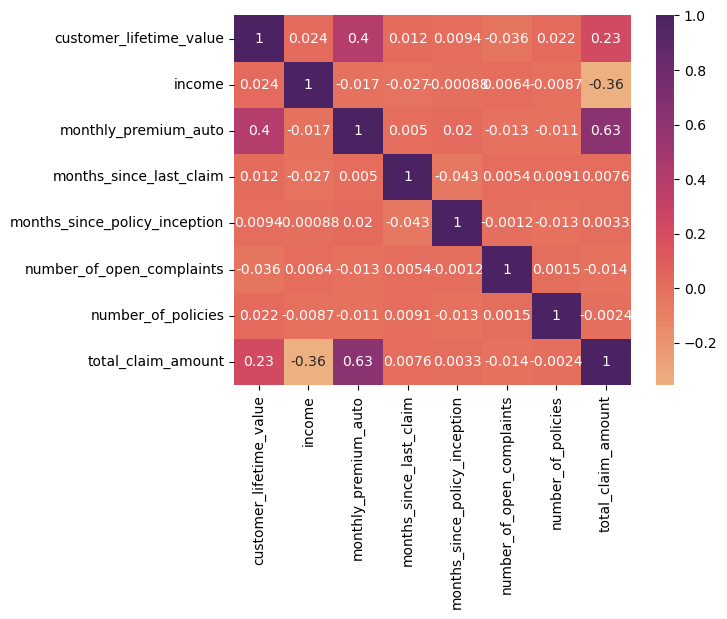

In [17]:
# Create a heatmap in order to visualize the correlations in a better way

cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap((correlation_matrix), annot=True, cmap=cmap)
plt.show()

# monthly_premium_auto and total_claim_amount have the highest correlation. It makes sense because the 
# more you pay monthly for your auto insurance, the more you can claim in case of a damage or acccident.

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [18]:
# Review unique values for numerical columns

numerical_vars_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [19]:
# Create function to split original numerical dataframe into two: one with discrete variables and another with continuous

def split_numerical_dataframes(df: pd.DataFrame, threshold = 36):
    '''
    Insert one numerical dataframe and return two: one with discrete variables and another one with continuous
    '''
    
    continuous_cols = df.columns[df.nunique() > threshold]
    discrete_cols = df.columns[df.nunique() <= threshold]

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [20]:
# Name both dataframes

continuous_df, discrete_df = split_numerical_dataframes(numerical_vars_df)

In [21]:
# Display both dataframes

display(continuous_df)
#display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [22]:
# Logic used before creating the function

#fig, ax = plt.subplots(1,3, figsize=(16,16))

#sns.histplot(x="months_since_last_claim", data = discrete_df, ax = ax[0]);
#ax[0].set_ylim((0,1000))

#sns.histplot(x="number_of_open_complaints", data = discrete_df, ax = ax[1]);
#ax[1].set_ylim((0,10000))

#sns.histplot(x="number_of_policies", data = discrete_df, ax = ax[2]);
#ax[2].set_ylim((0,3500))

In [23]:
# Create the function

def create_barplots(df: pd.DataFrame):
    '''
    This function creates barplots for all the columns in a dataframe that only has discrete variables
    '''

    columns_to_plot = df.columns
    num_columns = len(columns_to_plot)

    fig, ax = plt.subplots(1, num_columns, figsize=(16, 16))

    for i, column in enumerate(columns_to_plot):
        sns.histplot(x=column, data=df, ax=ax[i])
        #ax[i].set_ylim(0, 8000)

    plt.tight_layout()
    plt.show()

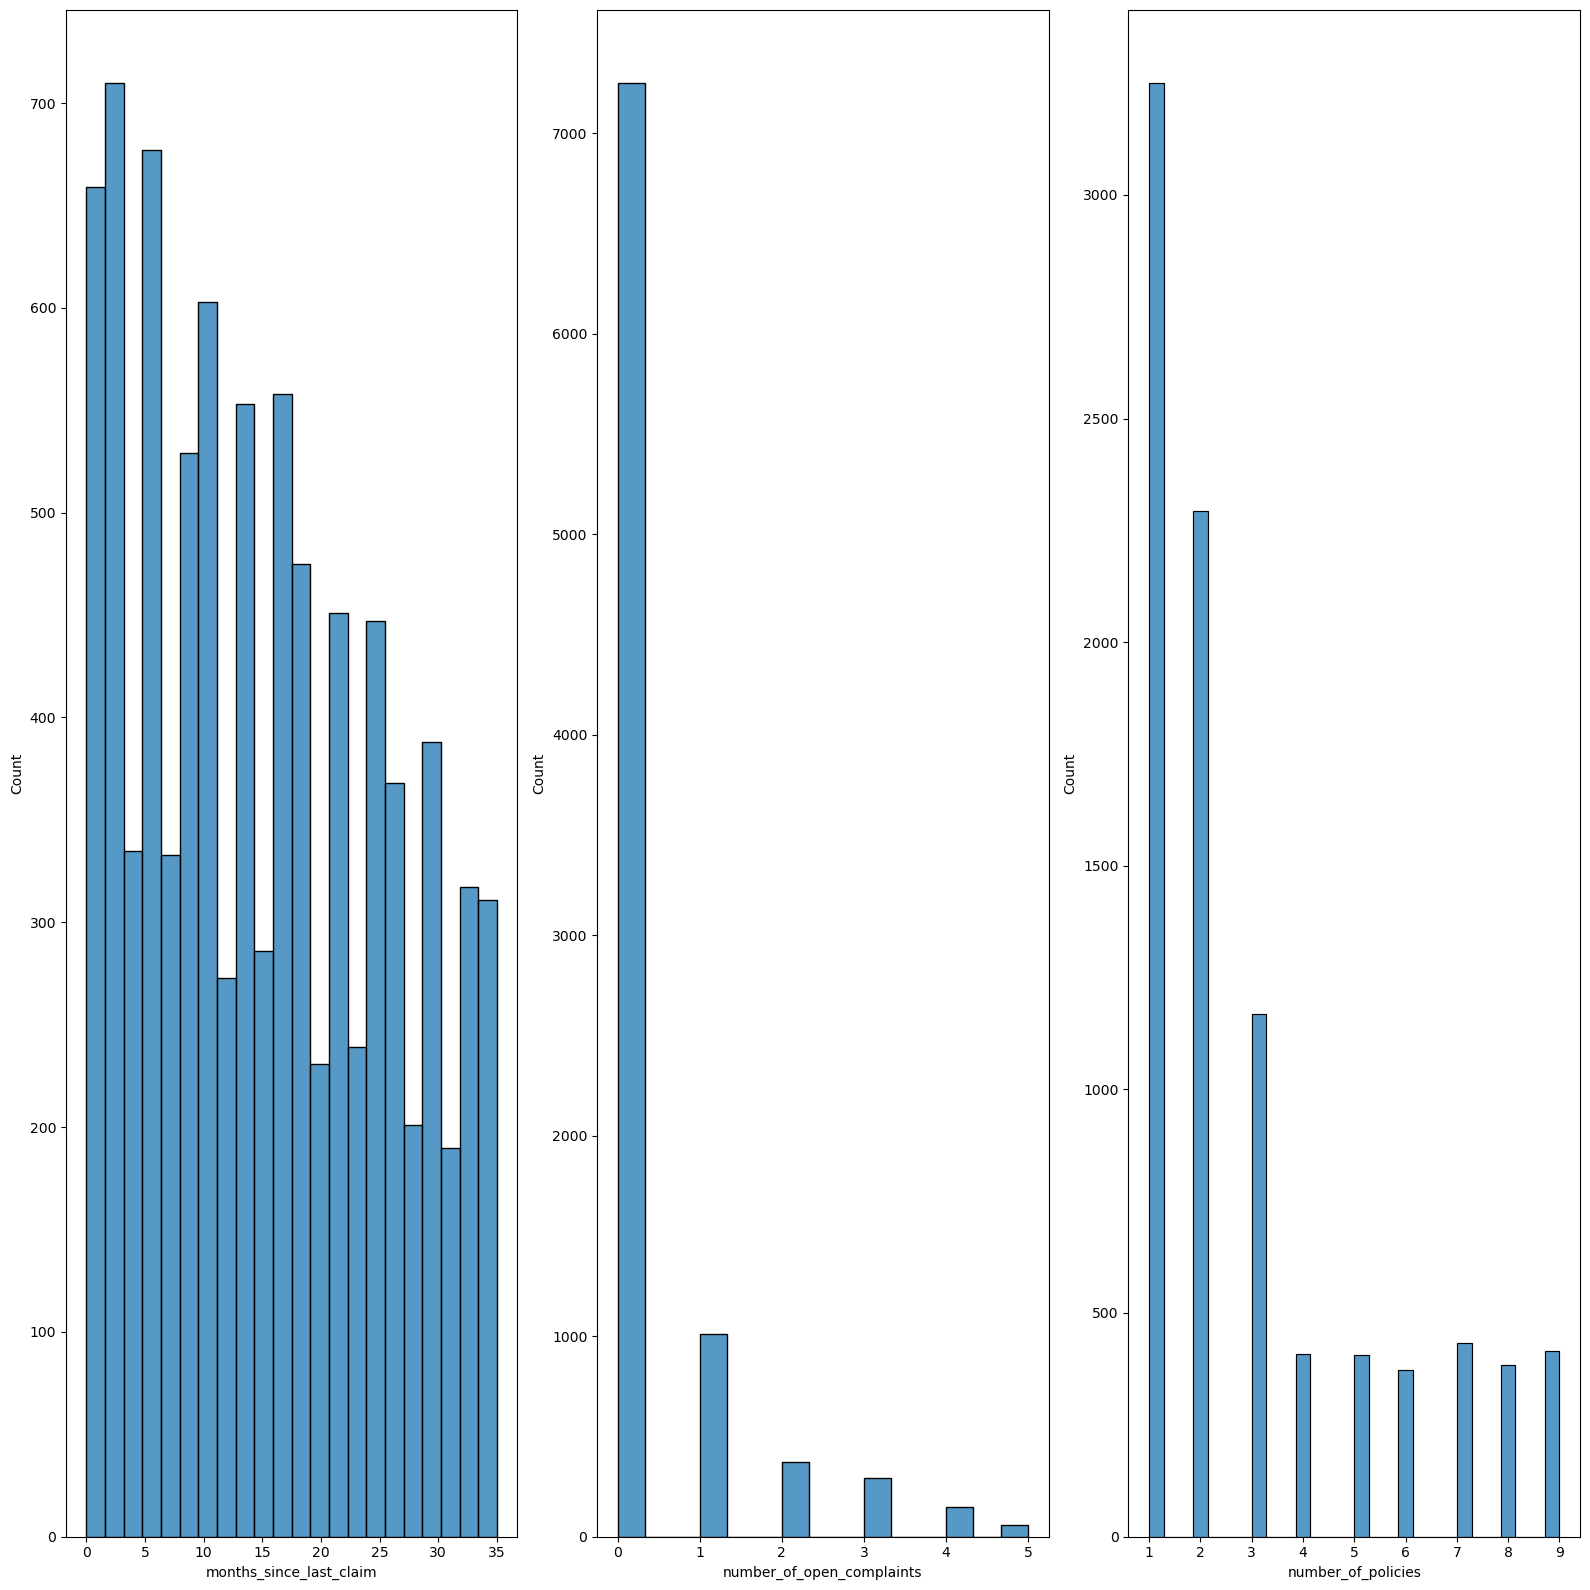

In [24]:
# Execute the function

create_barplots(discrete_df)

12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [25]:
# Logic used before creating the function

#fig, ax = plt.subplots(1,5, figsize=(16,16))

#sns.histplot(continuous_df, x = "customer_lifetime_value", bins=50, ax=ax[0])
#sns.histplot(continuous_df, x = "income", bins=50, ax=ax[1])
#sns.histplot(continuous_df, x = "monthly_premium_auto", bins=50, ax=ax[2])
#sns.histplot(continuous_df, x = "months_since_policy_inception", bins=50, ax=ax[3])
#sns.histplot(continuous_df, x = "total_claim_amount", bins=50, ax=ax[4])

In [26]:
# Create the function

def create_histograms(df: pd.DataFrame):
    '''
    This function histograms for all the columns in a dataframe that only has continuous variables
    '''

    columns_to_plot = df.columns
    num_columns = len(columns_to_plot)

    fig, ax = plt.subplots(1, num_columns, figsize=(16, 16))

    for i, column in enumerate(columns_to_plot):
        sns.histplot(df, x = column, bins=50, ax=ax[i])

    plt.tight_layout()
    plt.show()

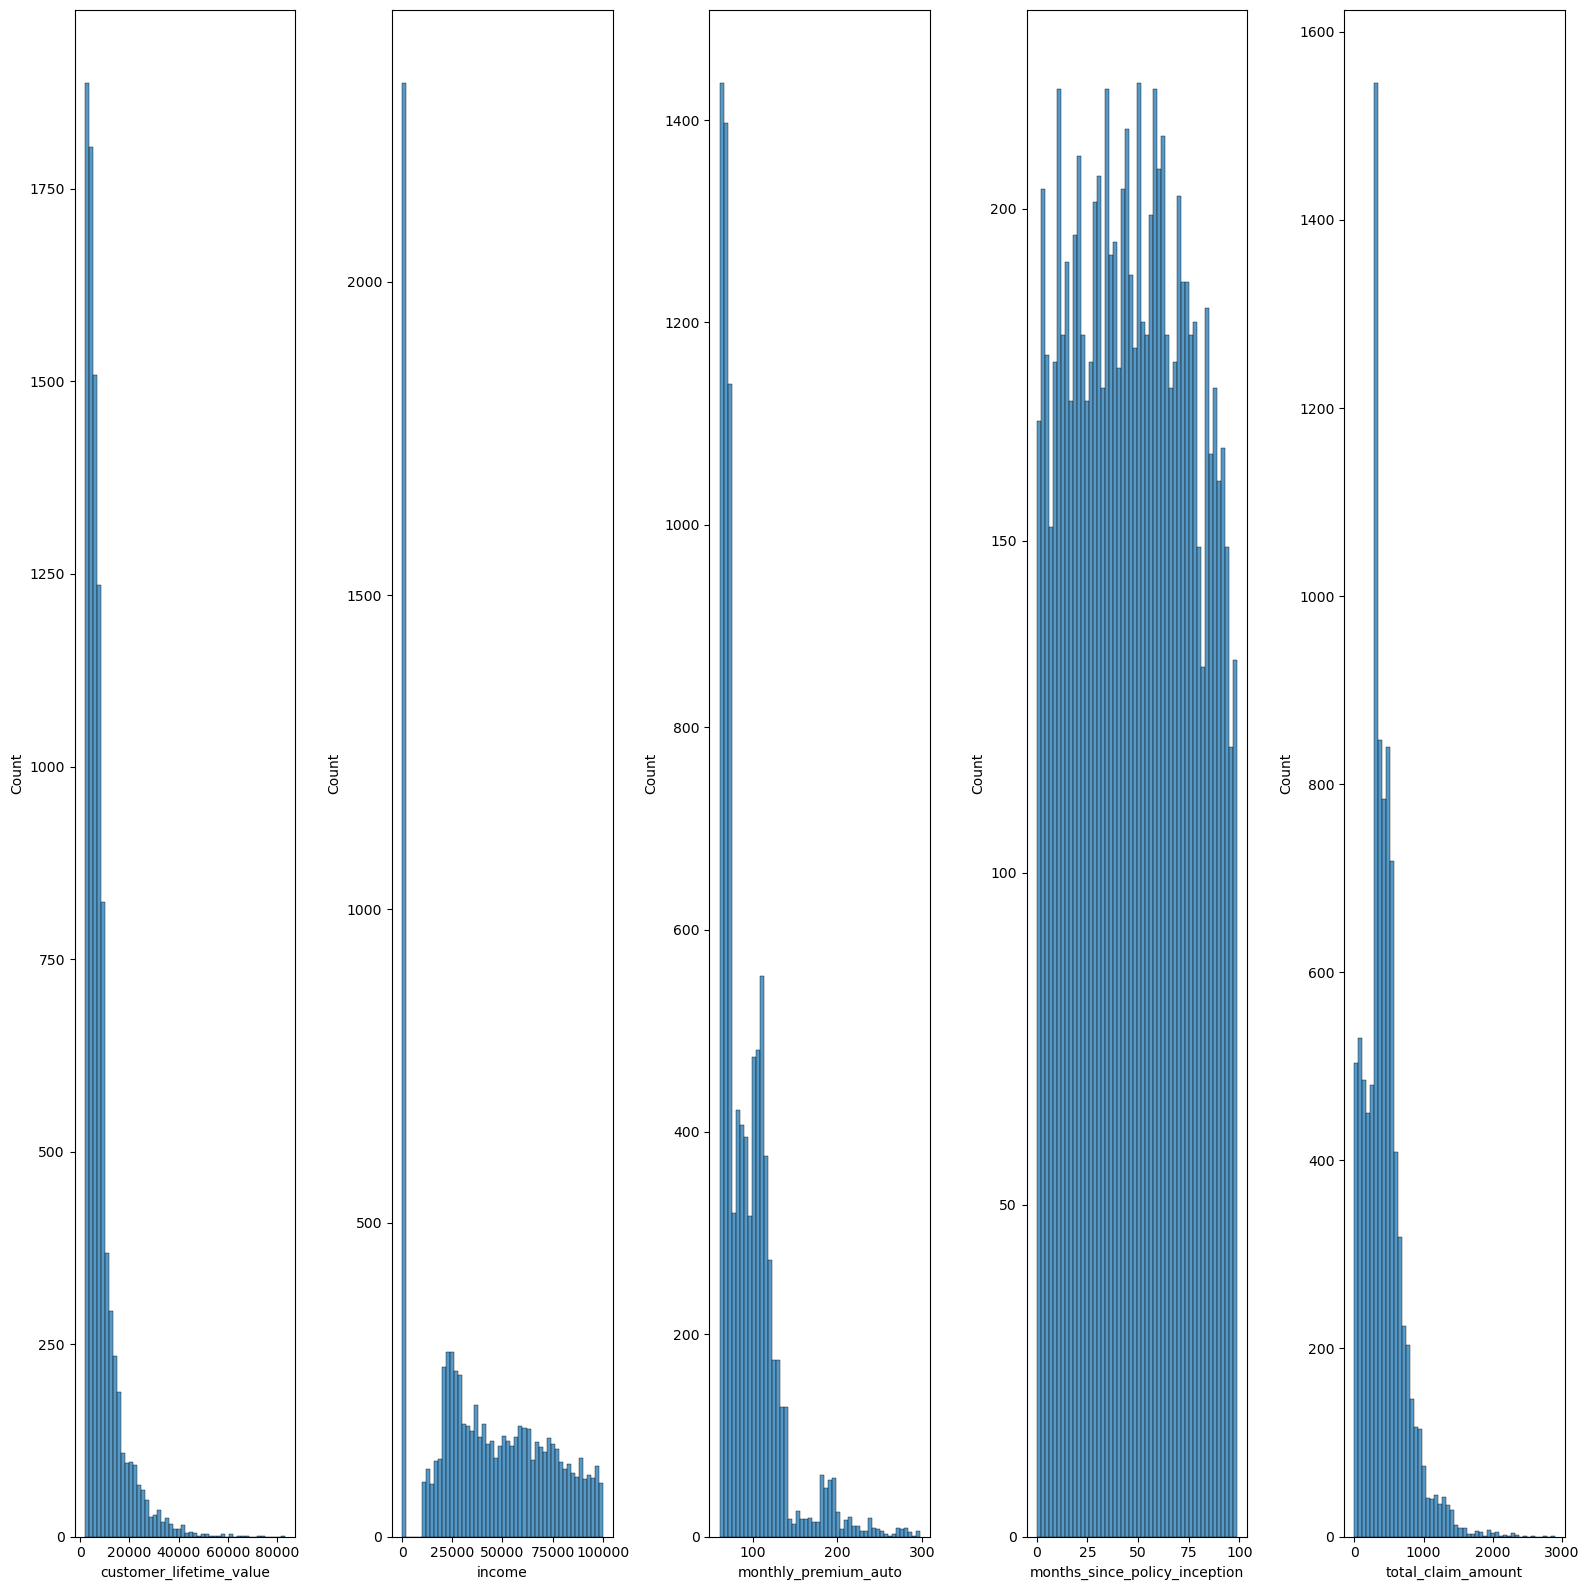

In [27]:
create_histograms(continuous_df)

13. According to the previous histogram plots, do you think that you will have to apply any transformation?

In [28]:
# From the previous histogram plots (and the data visualize in the continuous_df) we could say that applying 
# a transformation for those columns would be beneficial in order to have all column values in the same range.
# Let's do this with a MinMaxScaler()

In [29]:
# Let's transform the dataframe and create a new one named continuous_df_scaled

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

continuous_df_scaled = pd.DataFrame(scaler.fit_transform(continuous_df), columns=continuous_df.columns)
display(continuous_df_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,0.010629,0.562847,0.033755,0.050505,0.132974
1,0.062406,0.000000,0.139241,0.424242,0.391051
2,0.134960,0.487763,0.198312,0.383838,0.195764
3,0.070589,0.000000,0.189873,0.656566,0.183117
4,0.011245,0.438443,0.050633,0.444444,0.047710
...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.898990,0.068485
9130,0.014719,0.216081,0.075949,0.282828,0.131034
9131,0.076951,0.000000,0.101266,0.373737,0.273297
9132,0.069098,0.219452,0.147679,0.030303,0.238876


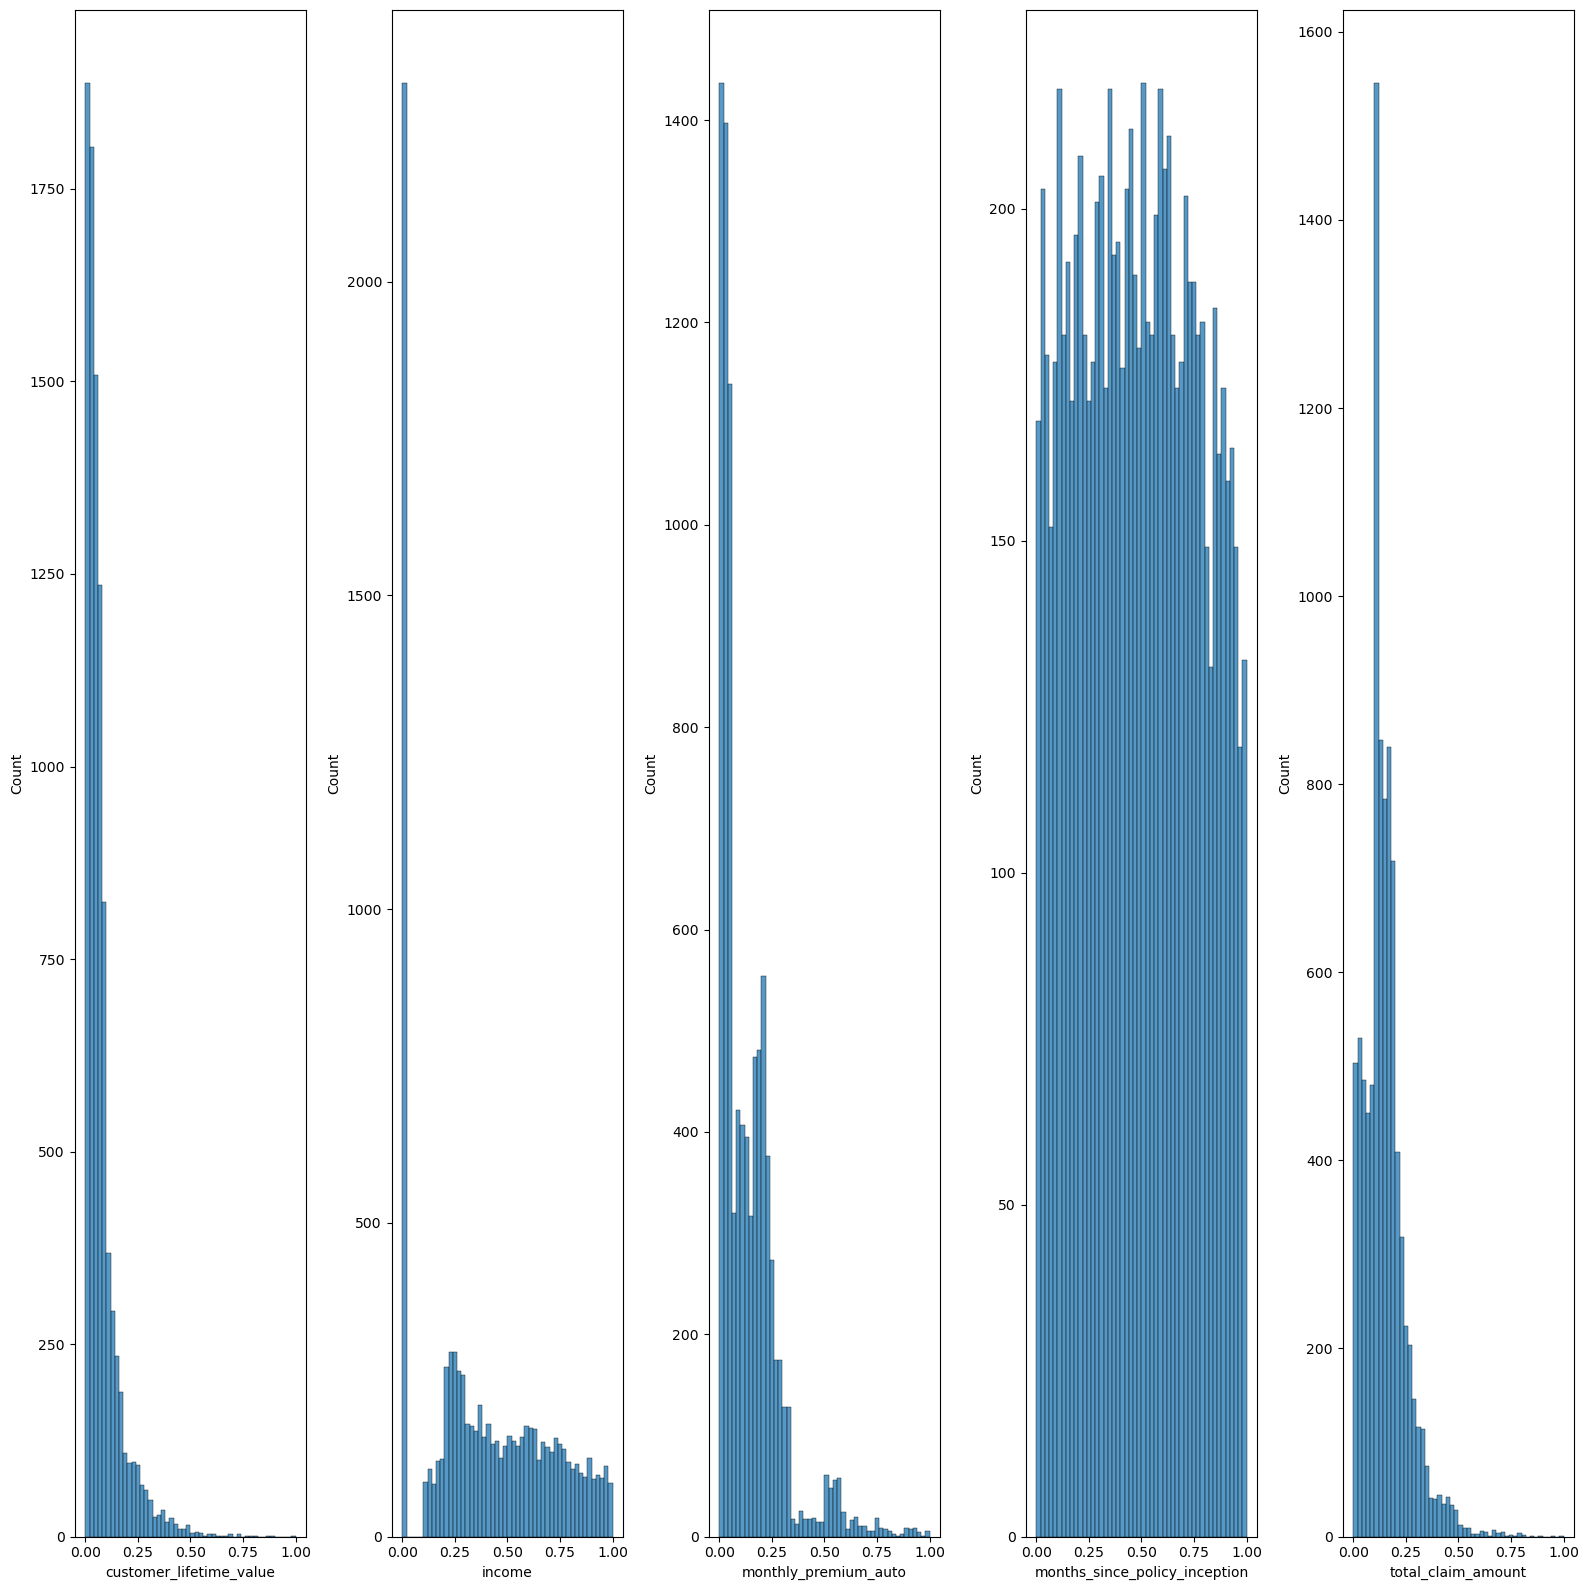

In [30]:
# Apply function on continuous_df_scaled

create_histograms(continuous_df_scaled)

# The distribution of the histograms is pretty much the same but now we have the x axis in the same scale among all the variables


14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [31]:
# Logic used before creating the function

#outliers_columns = continuous_df_scaled.columns

#fig, axes = plt.subplots(5, 1, figsize=(10,16))

#for i, col in enumerate(outliers_columns):
    #sns.boxplot(x=continuous_df_scaled[col], ax=axes[i])
    #axes[i].set_title(col, fontsize=10) 

#plt.subplots_adjust(hspace=1)      
    
#plt.show()

In [32]:
def create_boxplots(df: pd.DataFrame):
    '''
    This function boxplots for all the columns in a dataframe that only has continuous variables
    '''

    outliers_columns = df.columns

    fig, axes = plt.subplots(5, 1, figsize=(10,16))

    for i, col in enumerate(outliers_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col, fontsize=10) 

    plt.subplots_adjust(hspace=1)      
    
    plt.show()

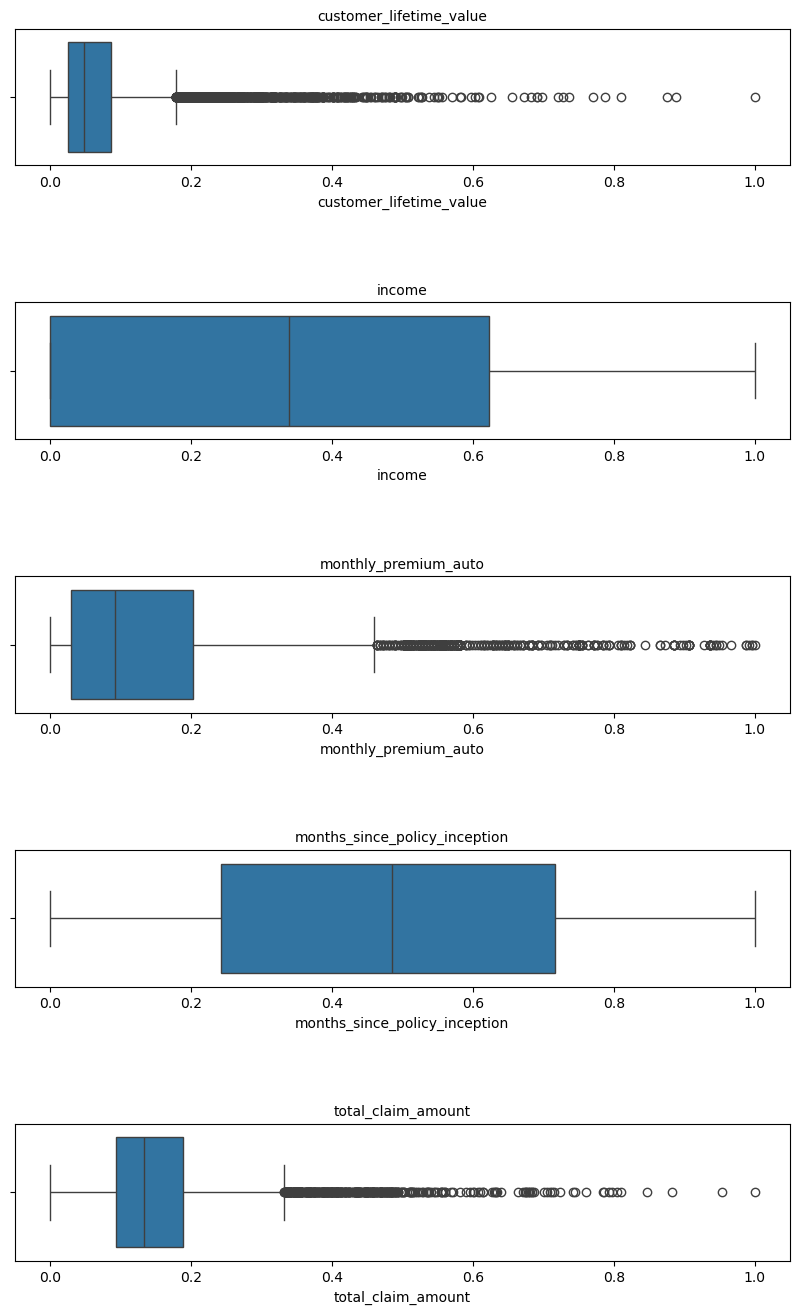

In [33]:
create_boxplots(continuous_df_scaled)

# Cleaning categorical data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [34]:
# Display categorical_vars_df

display(categorical_vars_df)

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
# Because of the way that I created the split_dataframes() function, the effective_to_date column was added into the categorical dataframe. Therefore, it's being plotted after the
# function below is executed. I will remove it from the categorical_vars_df dataframe.

categorical_vars_df.drop(['effective_to_date'], axis=1, inplace=True)
display(categorical_vars_df)

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/1224966596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars_df.drop(['effective_to_date'], axis=1, inplace=True)


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [36]:
# Logic used before creating the function

#sns.countplot(data=categorical_vars_df,y="state", order= categorical_vars_df['state'].value_counts().index)
#sns.countplot(data=categorical_vars_df,y="response", order= categorical_vars_df['response'].value_counts().index)
#sns.countplot(data=categorical_vars_df,y="education", order= categorical_vars_df['education'].value_counts().index)

def countplot_categorical(df: pd.DataFrame):
    '''
    This function retrieves a countplot (one per categorical variable) with the categories ordered by frequency
    '''

    categorical_cols = df.columns
    
    for col in categorical_cols:
        unique_values = df[col].nunique()
    
        if unique_values >= 6:
            sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        else:
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    
        plt.show()

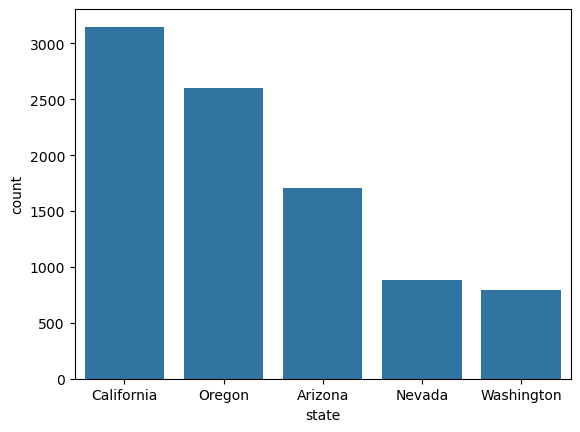

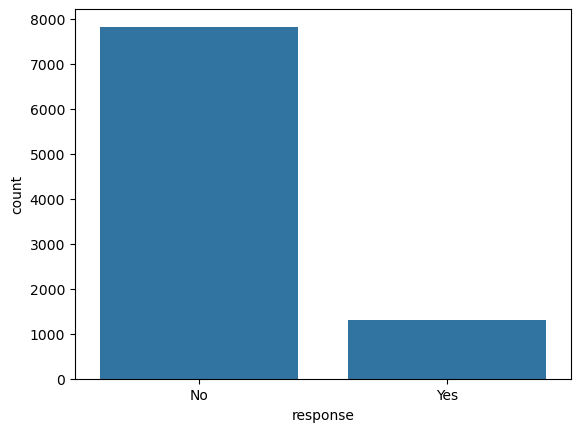

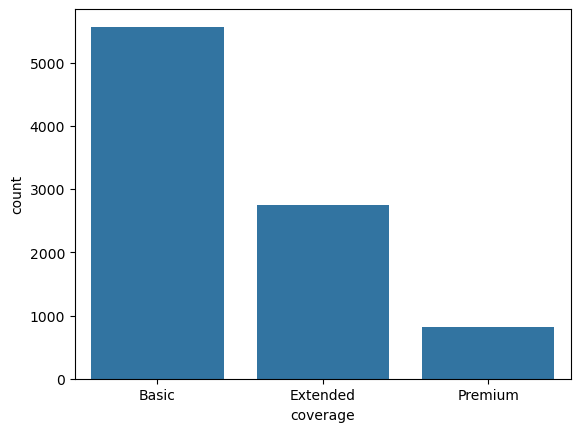

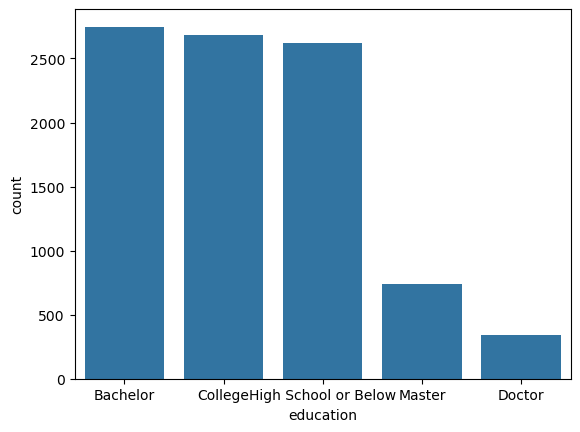

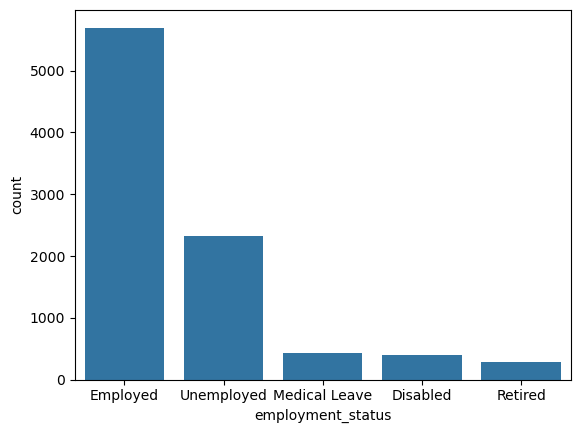

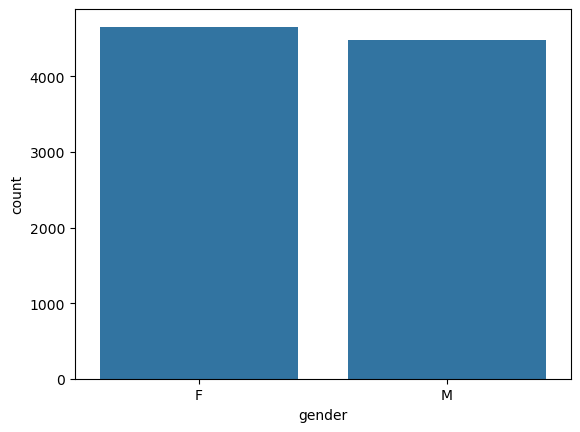

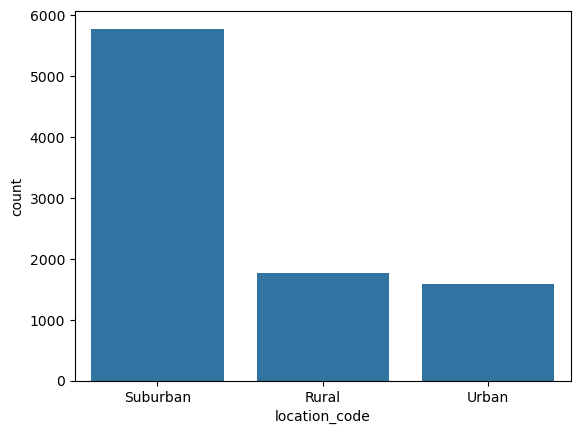

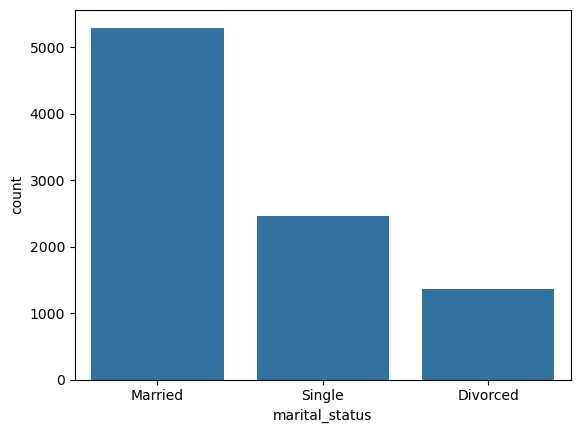

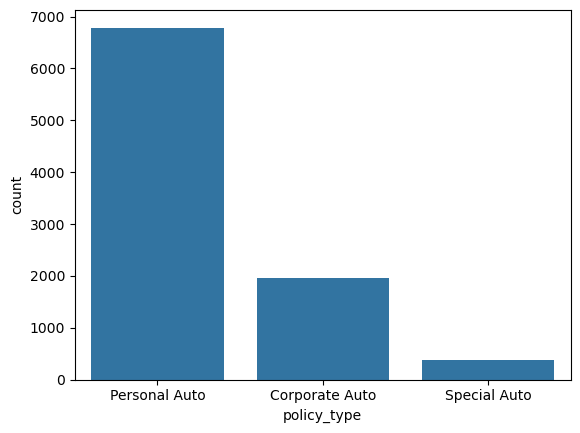

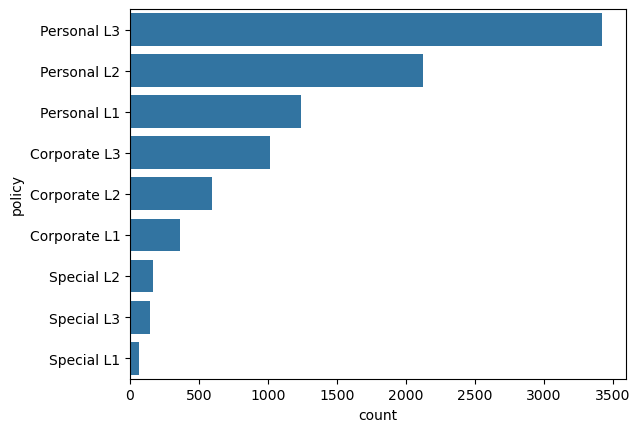

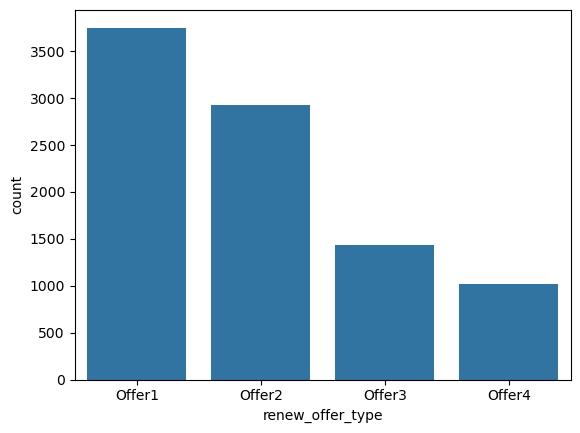

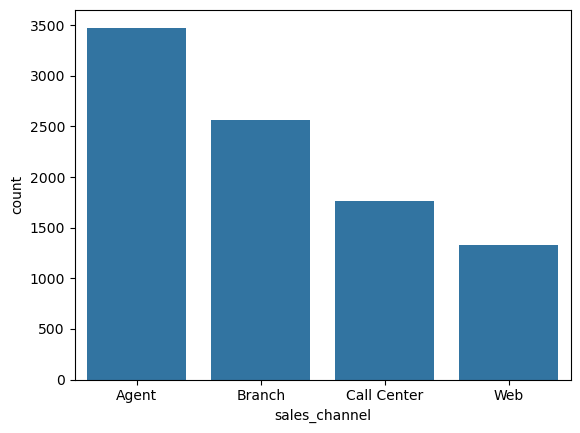

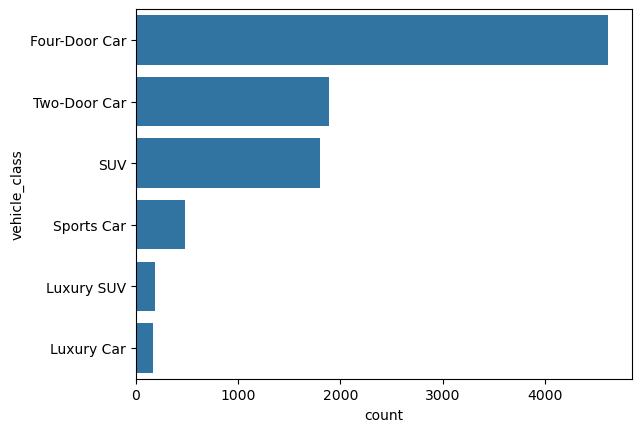

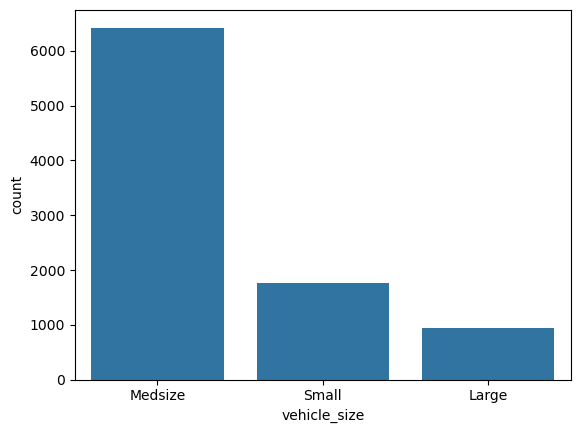

In [37]:
countplot_categorical(categorical_vars_df)

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [38]:
# Drop the column policy_type

categorical_vars_df.drop(['policy_type'], axis=1, inplace=True)

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/2926460810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars_df.drop(['policy_type'], axis=1, inplace=True)


In [39]:
categorical_vars_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [40]:
# Transform columns policy to L1, L2, L3 using a function

def replace_values(df: pd.DataFrame):
    '''
    This function picks a Pandas dataframe and replaces their values
    '''

    df['policy'].replace({'Corporate L1': 'L1',
                          'Special L1': 'L1',
                         'Personal L1': 'L1',
                         'Corporate L2': 'L2',
                         'Special L2': 'L2',
                         'Personal L2': 'L2',
                         'Corporate L3': 'L3',
                         'Special L3': 'L3',
                         'Personal L3': 'L3',}, inplace=True)

    return df

In [41]:
replace_values(categorical_vars_df)
categorical_vars_df['policy'].unique()

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/597500303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['policy'].replace({'Corporate L1': 'L1',


array(['L3', 'L2', 'L1'], dtype=object)

3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

<Axes: xlabel='effective_to_date', ylabel='total_claim_amount'>

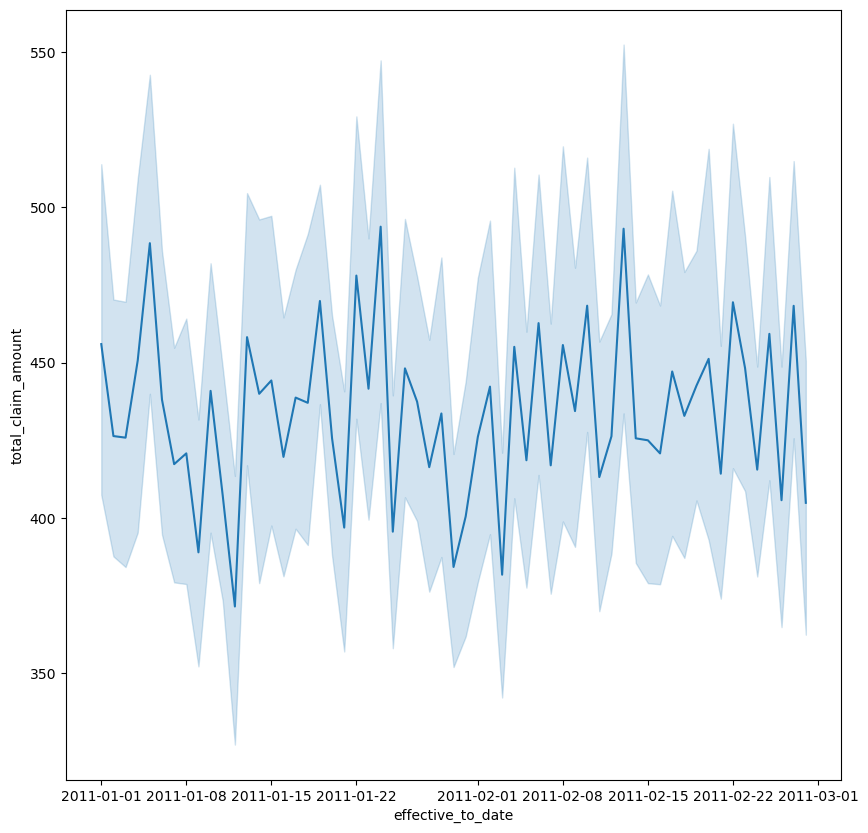

In [42]:
# Plot lineplot using data from original dataframe (customer_df)

fig, axes = plt.subplots(figsize=(10,10))
sns.lineplot(data=customer_df, x="effective_to_date", y="total_claim_amount")

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

In [43]:
# Create the new dataframe date_claim_amount_df

date_claim_amount_df = customer_df[['total_claim_amount']]
display(date_claim_amount_df)

,total_claim_amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


In [44]:
# Create columns from effective_to_date

date_claim_amount_df['day'] = customer_df['effective_to_date'].dt.day
date_claim_amount_df['day_name'] = customer_df['effective_to_date'].dt.strftime('%A')
date_claim_amount_df['week'] = customer_df['effective_to_date'].dt.strftime('%U')
date_claim_amount_df['month'] = customer_df['effective_to_date'].dt.strftime('%B')

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/4042895238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_claim_amount_df['day'] = customer_df['effective_to_date'].dt.day
/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/4042895238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_claim_amount_df['day_name'] = customer_df['effective_to_date'].dt.strftime('%A')
/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/4042895238.py:5: SettingWithCopyWar

In [45]:
display(date_claim_amount_df)

,total_claim_amount,day,day_name,week,month
0,384.811147,24,Thursday,08,February
1,1131.464935,31,Monday,05,January
2,566.472247,19,Saturday,07,February
3,529.881344,20,Thursday,03,January
4,138.130879,3,Thursday,05,February
...,...,...,...,...,...
9129,198.234764,10,Thursday,06,February
9130,379.200000,12,Saturday,06,February
9131,790.784983,6,Sunday,06,February
9132,691.200000,3,Thursday,05,February


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [46]:
# Group claim amount by week day

list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_claimed_day_name = round(date_claim_amount_df.groupby('day_name')['total_claim_amount'].sum().reindex(index=list_of_correct_days), 2)

total_claimed_day_name

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

<Axes: xlabel='day_name', ylabel='total_claim_amount'>

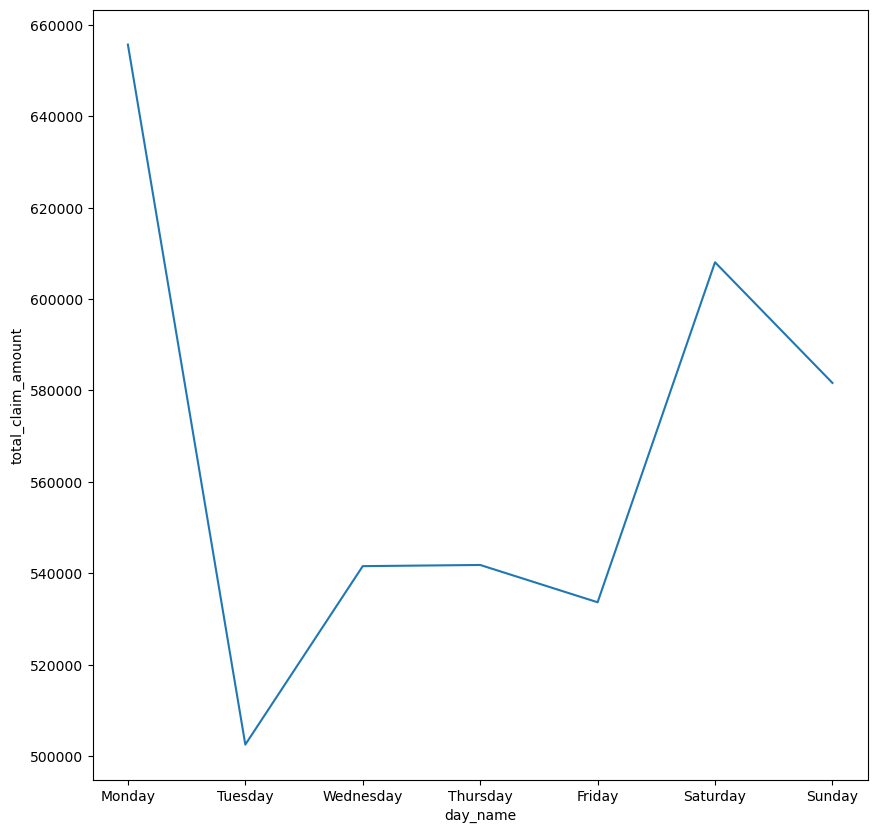

In [47]:
# Plot lineplot using data from total_claimed_day_name

fig, axes = plt.subplots(figsize=(10,10))
sns.lineplot(data=total_claimed_day_name)

# Spikes on Mondays (after the weekend) and Saturdays

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [48]:
total_claimed_week_day = date_claim_amount_df.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_days)
total_claimed_week_day

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [49]:
# Median claim amount by week day

median_day_week = date_claim_amount_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)
median_day_week

day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

9. Plot the median "target" by day of the week name using a seaborn barplot

<Axes: xlabel='day_name', ylabel='total_claim_amount'>

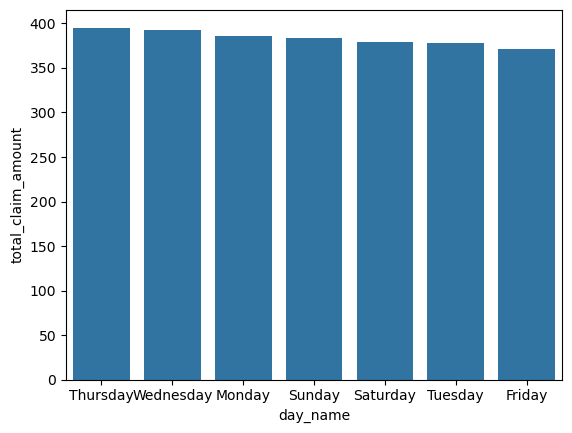

In [50]:
# Plot barplot using data from median_day_week

sns.barplot(data=median_day_week)


10. What can you conclude from this analysis?

In [51]:
# Mondays and Friday are the days with more claims
# The median amount per claim (by day of the week) doesn't vary that much

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [52]:
# Let's review how many unique values we have under the column "month"

date_claim_amount_df['month'].unique()

array(['February', 'January'], dtype=object)

In [53]:
list_of_correct_months = ['January', 'February']

total_claimed_month = round(date_claim_amount_df.groupby('month')['total_claim_amount'].sum().reindex(index=list_of_correct_months), 2)

total_claimed_month

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

12. Can you do a monthly analysis given the output of the previous series? Why?

In [54]:
# We can say that the total claim amounts were higher in January than in February but this information
# by itself - and not compared with other charts or other months - doesn't have a lot of value. Therefore,
# we would need more information to perform a more useful analysis.

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [55]:
# We've already seen a few steps behind how variables with outliers are behaving.
# Let's create the function and, after executing it, we can compare how's the current data.

from scipy.stats import zscore

def remove_outliers(df: pd.DataFrame, threshold: int=3) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range.

    Input:
    df: Pandas DataFrame

    Output:
    Pandas DataFrame with no outliers
    '''

    z_scores = zscore(df)

    outliers_bool = (abs(z_scores) > threshold).any(axis=1)
    
    clean_df = df[~outliers_bool]

    return clean_df

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [56]:
continuous_clean_df = remove_outliers(continuous_df)

In [57]:
# Review rows in continuous_df and continous_clean_df

print("Rows in continuous_df:",continuous_df.shape[0])
print("Rows in continuous_clean_df:",continuous_clean_df.shape[0])

Rows in continuous_df: 9134
Rows in continuous_clean_df: 8670


15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [58]:
# Review dataframes

display(continuous_clean_df) # 8670 rows, 5 columns
#display(discrete_df) # 9134 rows, 3 columns
#display(categorical_vars_df) # 9134 rows, 13 columns
#display(date_claim_amount_df) # 9134 rows, 5 columns

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [59]:
# Drop total_claim_amount, day and week (3) from the date_claim_amount_df

date_claim_amount_df.drop(columns=['total_claim_amount', 'day', 'week'], axis=1, inplace=True)
display(date_claim_amount_df)

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_49547/2817094421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_claim_amount_df.drop(columns=['total_claim_amount', 'day', 'week'], axis=1, inplace=True)


,day_name,month
0,Thursday,February
1,Monday,January
2,Saturday,February
3,Thursday,January
4,Thursday,February
...,...,...
9129,Thursday,February
9130,Saturday,February
9131,Sunday,February
9132,Thursday,February


In [60]:
# Concatenate dataframes

concat_df = pd.concat([continuous_clean_df, discrete_df, categorical_vars_df, date_claim_amount_df], axis=1)
display(concat_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Thursday,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,Monday,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Saturday,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,Thursday,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,Thursday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,NaN,NaN,NaN,NaN,NaN,7,0,2,California,No,...,M,Suburban,Married,L2,Offer3,Agent,Four-Door Car,Medsize,Thursday,February
9097,NaN,NaN,NaN,NaN,NaN,15,0,2,California,No,...,F,Suburban,Single,L3,Offer4,Branch,Two-Door Car,Small,Friday,February
9103,NaN,NaN,NaN,NaN,NaN,24,0,4,California,No,...,F,Suburban,Single,L3,Offer1,Agent,Luxury SUV,Large,Saturday,January
9110,NaN,NaN,NaN,NaN,NaN,10,0,2,California,Yes,...,F,Suburban,Married,L2,Offer2,Agent,Sports Car,Medsize,Friday,January


In [61]:
# Drop NaNs and reset_index

concat_df.dropna(inplace=True)
concat_df.reset_index(drop=True, inplace=True)
display(concat_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Thursday,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,Monday,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Saturday,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,Thursday,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,Thursday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,Thursday,February
8666,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,Saturday,February
8667,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,Sunday,February
8668,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,Thursday,February


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [62]:
# Move column to last position

column_to_move = concat_df.pop("total_claim_amount") # Remove the column
concat_df.insert(22, "total_claim_amount", column_to_move) # Insert it again
display(concat_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Thursday,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,Monday,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,Saturday,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,Thursday,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,Thursday,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,Basic,...,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,Thursday,February,198.234764
8666,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,Extended,...,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,Saturday,February,379.200000
8667,8163.890428,0.0,85.0,37.0,9,3,2,California,No,Extended,...,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,Sunday,February,790.784983
8668,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,Extended,...,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,Thursday,February,691.200000


17. Turn the response column values into (Yes=1/No=0).

In [63]:
# Create dictionary and replace values

response_dict = {'Yes': 1, 'No': 0}
concat_df['response'] = concat_df['response'].replace(response_dict)

# Review unique values

concat_df['response'].unique()

array([0, 1])

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [64]:
# Review value counts

concat_df['education'].value_counts()

education
Bachelor                2618
College                 2557
High School or Below    2466
Master                   700
Doctor                   329
Name: count, dtype: int64

In [65]:
# Group and replace values

education_dict = {'Master' : 'Graduate', 'Doctor' : 'Graduate'}
concat_df['education'] = concat_df['education'].replace(education_dict)

# Review value_counts()

concat_df['education'].value_counts()

education
Bachelor                2618
College                 2557
High School or Below    2466
Graduate                1029
Name: count, dtype: int64

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [66]:
# Review value counts

concat_df['employment_status'].value_counts()

employment_status
Employed         5418
Unemployed       2169
Medical Leave     418
Disabled          391
Retired           274
Name: count, dtype: int64

In [67]:
# Group and replace values

empl_status_dict = {'Medical Leave' : 'Inactive', 'Disabled' : 'Inactive', 'Retired' : 'Inactive'}
concat_df['employment_status'] = concat_df['employment_status'].replace(empl_status_dict)

# Review value_counts()

concat_df['employment_status'].value_counts()

employment_status
Employed      5418
Unemployed    2169
Inactive      1083
Name: count, dtype: int64

20. Deal with column Gender turning the values into (1/0)

In [68]:
# Create dictionary and replace values

gender_dict = {'F': 1, 'M': 0}
concat_df['gender'] = concat_df['gender'].replace(gender_dict)

# Review unique values

concat_df['gender'].unique()

array([1, 0])

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [69]:
# Review value counts

concat_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4588
Two-Door Car     1871
SUV              1672
Sports Car        441
Luxury Car         50
Luxury SUV         48
Name: count, dtype: int64

In [70]:
# Group and replace values

vehicle_class_dict = {'Sports Car' : 'Luxury', 'Luxury Car' : 'Luxury', 'Luxury SUV' : 'Luxury'}
concat_df['vehicle_class'] = concat_df['vehicle_class'].replace(vehicle_class_dict)

# Review value_counts()

concat_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4588
Two-Door Car     1871
SUV              1672
Luxury            539
Name: count, dtype: int64

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [71]:
# Review categorical columns and unique values

concat_df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [72]:
# Group and replace values

coverage_dict = {'Basic' : 0, 'Extended' : 1, 'Premium' : 2}
concat_df['coverage'] = concat_df['coverage'].replace(coverage_dict)

# Review value_counts()

concat_df['coverage'].unique()

array([0, 1, 2])

23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [73]:
# Group and replace values

empl_status_dict_2 = {'Unemployed' : 0, 'Inactive' : 1, 'Employed' : 2}
concat_df['employment_status'] = concat_df['employment_status'].replace(empl_status_dict_2)

# Review value_counts()

concat_df['employment_status'].unique()

array([2, 0, 1])

24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [74]:
# Group and replace values

location_dict = {'Rural' : 0, 'Suburban' : 1, 'Urban' : 2}
concat_df['location_code'] = concat_df['location_code'].replace(location_dict)

# Review value_counts()

concat_df['location_code'].unique()

array([1, 0, 2])

25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [75]:
# Group and replace values

vehicle_size_dict = {'Small' : 0, 'Medsize' : 1, 'Large' : 2}
concat_df['vehicle_size'] = concat_df['vehicle_size'].replace(vehicle_size_dict)

# Review value_counts()

concat_df['vehicle_size'].unique()

array([1, 0, 2])

26. Get a dataframe with the categorical nominal columns

In [76]:
# Review columns and data types

concat_df.dtypes 

# After the modifications made in the categorical ordinal columns, these are the ones left:
# state, education, marital_status, policy, renew_offer_type, sales_channel, vehicle_class, day_name, week

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_policy_inception    float64
months_since_last_claim            int64
number_of_open_complaints          int64
number_of_policies                 int64
state                             object
response                           int64
coverage                           int64
education                         object
employment_status                  int64
gender                             int64
location_code                      int64
marital_status                    object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                       int64
day_name                          object
month                             object
total_claim_amount               float64
dtype: object

In [77]:
# Create dataframe

categorical_columns = ['state','education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'day_name', 'month']

categorical_nominal_df = concat_df[categorical_columns]

display(categorical_nominal_df)

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday,January
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February
...,...,...,...,...,...,...,...,...,...
8665,California,Bachelor,Married,L1,Offer2,Web,Four-Door Car,Thursday,February
8666,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday,February
8667,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday,February
8668,California,College,Married,L2,Offer3,Branch,Four-Door Car,Thursday,February


27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [78]:
# Let's take the categorical columns
categorical_columns = ['state', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'day_name', 'month']

# Create a list of named levels
levels = [list(concat_df[col].unique()) for col in categorical_columns]

# Display levels
display(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 ['February', 'January']]

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)

# Lab Comparing Regression Models

1. Define X and y

In [80]:
# We would like to predict "total_claim_amount" so this will be our y variable

y = concat_df['total_claim_amount']
X = concat_df.drop(columns = 'total_claim_amount')

2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [81]:
from sklearn.model_selection import train_test_split

# Split data into train and test set for both X_value and y_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)

# This retrieves a numpy array. Therefore, we need to create dataframes for our X_train and X_test sets

X_train_df = pd.DataFrame(X_train, columns = X.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns = X.columns).reset_index(drop=True)

3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [82]:
# Split X_train_df and X_test_df into numerical and categorical

import numpy as np

# When creating the numerical dataframes, we need to drop those categorical columns that we transformed to 0/1

X_train_num = X_train_df.select_dtypes(include = np.number).drop(columns=['response', 'coverage', 'employment_status', 'gender', 'location_code', 'vehicle_size'])
X_test_num = X_test_df.select_dtypes(include = np.number).drop(columns=['response', 'coverage', 'employment_status', 'gender', 'location_code', 'vehicle_size'])

X_train_cat = X_train_df.select_dtypes(include = object)
X_test_cat = X_test_df.select_dtypes(include = object)

4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [83]:
# Before encoding the categorical variables on both X_train_cat and X_test_cat dataframes, we will fit
# our train set

encoder.fit(X_train_cat)

# Apply encoder to both train and test sets. We need to apply toarray() because the onehotencoder transformation
# returns a sparse matrix (instead of a numpy array)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray() # Returns a numpy array
X_test_cat_encoded = encoder.transform(X_test_cat).toarray() # Returns a numpy array

columns_cat = encoder.get_feature_names_out(input_features = categorical_columns)

In [84]:
# Create dataframes

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = columns_cat).reset_index(drop=True)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns = columns_cat).reset_index(drop=True)

In [85]:
# Display dataframes

display(X_train_cat_encoded_df)
display(X_test_cat_encoded_df)

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6065,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2597,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2598,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2599,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [86]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer() # Define transformer

power_transformer.fit(X_train_num) # Fit the train set

# Apply transformer to both train and test sets
# There's no need to apply toarray() as the transformation from the Power Transformer already returns a numpy array

X_train_num_transformed = power_transformer.transform(X_train_num) # Returns a numpy array
X_test_num_transformed = power_transformer.transform(X_test_num) # Returns a numpy array

In [87]:
# Create dataframes

X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns = X_train_num.columns).reset_index(drop=True)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns = X_test_num.columns).reset_index(drop=True)

In [88]:
# Display dataframes

display(X_train_num_transformed_df)
display(X_test_num_transformed_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
0,1.865510,1.052497,-0.667982,-1.191887,0.317418,-0.507894,-0.060928
1,-0.103486,1.093370,-0.977917,0.389688,1.523199,-0.507894,1.130043
2,-1.418971,0.933212,-0.977917,0.421971,0.404090,-0.507894,-1.136193
3,0.103935,-1.642693,0.286472,1.097570,0.228594,-0.507894,1.316016
4,-0.875178,0.331249,0.451236,1.527755,-1.680546,-0.507894,-1.136193
...,...,...,...,...,...,...,...
6064,-0.085806,0.214675,-0.896372,-0.406437,1.250878,-0.507894,0.514859
6065,1.276482,0.999443,1.045543,0.291864,1.523199,2.013678,-0.060928
6066,-0.997553,0.846289,0.053671,-1.287331,0.961993,-0.507894,-1.136193
6067,0.029519,1.015045,-0.461396,-1.145462,-1.946379,1.923138,1.667277


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
0,-0.022998,0.109433,-0.667982,1.068113,0.228594,-0.507894,0.878092
1,0.546609,1.022941,-0.977917,-0.520102,-0.712182,2.026025,-0.060928
2,-1.466357,1.092757,-1.062400,0.486070,0.228594,-0.507894,-1.136193
3,0.612614,0.171939,-0.528021,0.057401,-1.127045,-0.507894,-0.060928
4,-1.523230,0.716244,-0.977917,-2.004233,-0.841324,2.026025,-1.136193
...,...,...,...,...,...,...,...
2596,-1.380864,1.055306,-0.896372,-1.924248,0.886767,-0.507894,-1.136193
2597,-0.312383,0.105784,1.488918,1.386660,1.654038,-0.507894,-1.136193
2598,0.494302,-1.642693,0.941170,1.386660,0.043719,-0.507894,0.514859
2599,0.350322,1.046965,0.286472,-0.259136,-0.712182,-0.507894,1.130043


6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [89]:
# Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new

X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)

# Display dataframe

display(X_train_new)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_Arizona,state_Nevada,state_California,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,1.865510,1.052497,-0.667982,-1.191887,0.317418,-0.507894,-0.060928,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.103486,1.093370,-0.977917,0.389688,1.523199,-0.507894,1.130043,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.418971,0.933212,-0.977917,0.421971,0.404090,-0.507894,-1.136193,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.103935,-1.642693,0.286472,1.097570,0.228594,-0.507894,1.316016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.875178,0.331249,0.451236,1.527755,-1.680546,-0.507894,-1.136193,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,-0.085806,0.214675,-0.896372,-0.406437,1.250878,-0.507894,0.514859,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6065,1.276482,0.999443,1.045543,0.291864,1.523199,2.013678,-0.060928,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6066,-0.997553,0.846289,0.053671,-1.287331,0.961993,-0.507894,-1.136193,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6067,0.029519,1.015045,-0.461396,-1.145462,-1.946379,1.923138,1.667277,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [90]:
# Concat X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

# Display dataframe

display(X_test_new)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_Arizona,state_Nevada,state_California,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,-0.022998,0.109433,-0.667982,1.068113,0.228594,-0.507894,0.878092,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.546609,1.022941,-0.977917,-0.520102,-0.712182,2.026025,-0.060928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.466357,1.092757,-1.062400,0.486070,0.228594,-0.507894,-1.136193,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.612614,0.171939,-0.528021,0.057401,-1.127045,-0.507894,-0.060928,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.523230,0.716244,-0.977917,-2.004233,-0.841324,2.026025,-1.136193,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,-1.380864,1.055306,-0.896372,-1.924248,0.886767,-0.507894,-1.136193,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2597,-0.312383,0.105784,1.488918,1.386660,1.654038,-0.507894,-1.136193,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2598,0.494302,-1.642693,0.941170,1.386660,0.043719,-0.507894,0.514859,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2599,0.350322,1.046965,0.286472,-0.259136,-0.712182,-0.507894,1.130043,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [91]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() # Define transformer

min_max_scaler.fit(X_train_new) # Fit the train set

# Apply transformer to both train and test sets
# There's no need to apply toarray() as the transformation from the MinMaxScaler() already returns a numpy array

X_train_new_scaled = min_max_scaler.transform(X_train_new) # Returns a numpy array
X_test_new_scaled = min_max_scaler.transform(X_test_new) # Returns a numpy array

In [92]:
# Create dataframes

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns = X_train_new.columns).reset_index(drop=True)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns = X_test_new.columns).reset_index(drop=True)

In [93]:
# Display dataframes

display(X_train_new_scaled_df )
display(X_test_new_scaled_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_Arizona,state_Nevada,state_California,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,0.906258,0.978658,0.236125,0.242316,0.628760,0.000000,0.383548,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.466154,0.993500,0.151676,0.665606,0.963660,0.000000,0.808368,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.172121,0.935344,0.151676,0.674246,0.652833,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.512516,0.000000,0.496187,0.855062,0.604089,0.000000,0.874705,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.293668,0.716764,0.541080,0.970196,0.073834,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,0.470106,0.674434,0.173895,0.452532,0.888024,0.000000,0.588932,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6065,0.774601,0.959394,0.703012,0.639424,0.963660,0.993625,0.383548,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6066,0.266316,0.903782,0.432755,0.216772,0.807788,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6067,0.495883,0.965059,0.292414,0.254741,0.000000,0.957948,1.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_Arizona,state_Nevada,state_California,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,0.484145,0.636220,0.236125,0.847178,0.604089,0.00000,0.718497,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.611462,0.967926,0.151676,0.422111,0.342793,0.99849,0.383548,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.161530,0.993277,0.128657,0.691401,0.604089,0.00000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.626215,0.658916,0.274260,0.576673,0.227566,0.00000,0.383548,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.148818,0.856561,0.151676,0.024902,0.306924,0.99849,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.180639,0.979678,0.173895,0.046309,0.786894,0.00000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2597,0.419462,0.634895,0.823819,0.932433,1.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2598,0.599770,0.000000,0.674573,0.932433,0.552741,0.00000,0.588932,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2599,0.567588,0.976650,0.496187,0.491956,0.342793,0.00000,0.808368,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [94]:
# Import model and train it with our train sets

from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train_new_scaled_df, y_train)

LinearRegression()

In [95]:
# Get predictions now that the model was trained

y_train_pred = linear_regression_model.predict(X_train_new_scaled_df)
y_test_pred = linear_regression_model.predict(X_test_new_scaled_df)

print("Predictions for train set:", y_train_pred)
print("Predictions for test set:",y_test_pred)

Predictions for train set: [265.51717838 260.61386644 241.55970748 ... 330.20497246 256.0733953
 205.34474948]
Predictions for test set: [325.47335817 187.36575545 252.56200211 ... 678.31927718 364.00590085
 228.35010377]


9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

In [96]:
# Create function to compute metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics_report(y_train: list, y_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes a list of values and returns a Pandas DataFrame collecting all the errors metrics
    
    Inputs: List of values 
    
    Outputs: Dataframe
    '''

    # Mean absolute error
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test  = mean_squared_error(y_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_test,  y_pred_test,  squared=False)

    # R2
    R2_train = r2_score(y_train, y_pred_train)
    R2_test  = r2_score(y_test,  y_pred_test)

    # Mean absolute percentage error
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train)
    MAPE_test = mean_absolute_percentage_error(y_test,  y_pred_test)

    train_metrics = [MAE_train, MSE_train, RMSE_train, R2_train, MAPE_train]
    test_metrics = [MAE_test, MSE_test, RMSE_test, R2_test, MAPE_test]

    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics

    return df

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [97]:
error_metrics_report(y_train, y_test, y_train_pred, y_test_pred)

,test_value,train_value
MAE,133.499137,134.175404
MSE,31249.733622,31800.795055
RMSE,176.775942,178.327774
MAPE,0.404146,0.422565
R2,2.380021,2.367127


11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [98]:
def train_models(list_of_models: list, X_train, y_train) -> list:
    '''
    This function takes a list of models, the X_train and y_train and returns a list of trained models
    
    Inputs: List of models, the X_train and y_train
    
    Outputs: List of trained models
    '''

    trained_models = []
    
    for model in list_of_models:
        model.fit(X_train, y_train)
        trained_models.append(model)

    return trained_models

12. Use the function to train the following models (with default settings):
    
- LinearRegressor

- KNeighborsRegressor

- MLPRegressor

In [99]:
# Let's import KNeighborsRegressor and MLPRegressor models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

list_of_models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

train_models(list_of_models, X_train_new_scaled_df, y_train)

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

13. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [110]:
# LinearRegression()

performance_dataframe = []

for model in list_of_models:
    y_train_pred = model.predict(X_train_new_scaled_df)
    y_test_pred = model.predict(X_test_new_scaled_df)
    print(f'Error metrics for {model}:')
    display(error_metrics_report(y_train, y_test, y_train_pred, y_test_pred))

Error metrics for LinearRegression():


,test_value,train_value
MAE,133.499137,134.175404
MSE,31249.733622,31800.795055
RMSE,176.775942,178.327774
MAPE,0.404146,0.422565
R2,2.380021,2.367127


Error metrics for KNeighborsRegressor():


,test_value,train_value
MAE,152.806593,123.640788
MSE,41102.764966,27209.609643
RMSE,202.738168,164.953356
MAPE,0.216273,0.505931
R2,2.809011,2.087188


Error metrics for MLPRegressor():


,test_value,train_value
MAE,133.840040,133.999771
MSE,31169.967215,31580.657761
RMSE,176.550183,177.709476
MAPE,0.405667,0.426562
R2,2.363061,2.382660


In [ ]:
# Even if values are pretty similar, the MLPRegressor() model has the best performance of 
# all three models.